# Problem Statement 
Consider only the below columns and prepare a prediction model for predicting Price.                
Corolla [c("Price" , "Age_08_04" , "KM" , "HP" , "cc" , "Doors" , "Gears" , "Quarterly_Tax" , "Weight")]

    Price          -- Offer Price in EUROs	
    Age_08_04      -- Age in months as in August 2004	    
    KM             -- Accumulated Kilometers on odometer    
    HP             -- Horse Power    
    cc             -- Cylinder Volume in cubic centimeters
    Doors          -- Number of doors    
    Gears          -- Number of gear positions
    Quarterly_Tax  -- Quarterly road tax in EUROs
    Weight         -- Weight in Kilograms

# Importing Necessary Libraries

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Data

In [37]:
raw_data = pd.read_csv('ToyotaCorolla.csv', encoding='LATIN')
raw_data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


# Data Cleaning

In [38]:
data = raw_data[["Price" , "Age_08_04" , "KM" , "HP" , "cc" , "Doors" , "Gears" , "Quarterly_Tax" , "Weight"]]
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [39]:
# Replacing a wrong data point
filt = (data['cc']==16000)
data.loc[filt,'cc']=1600

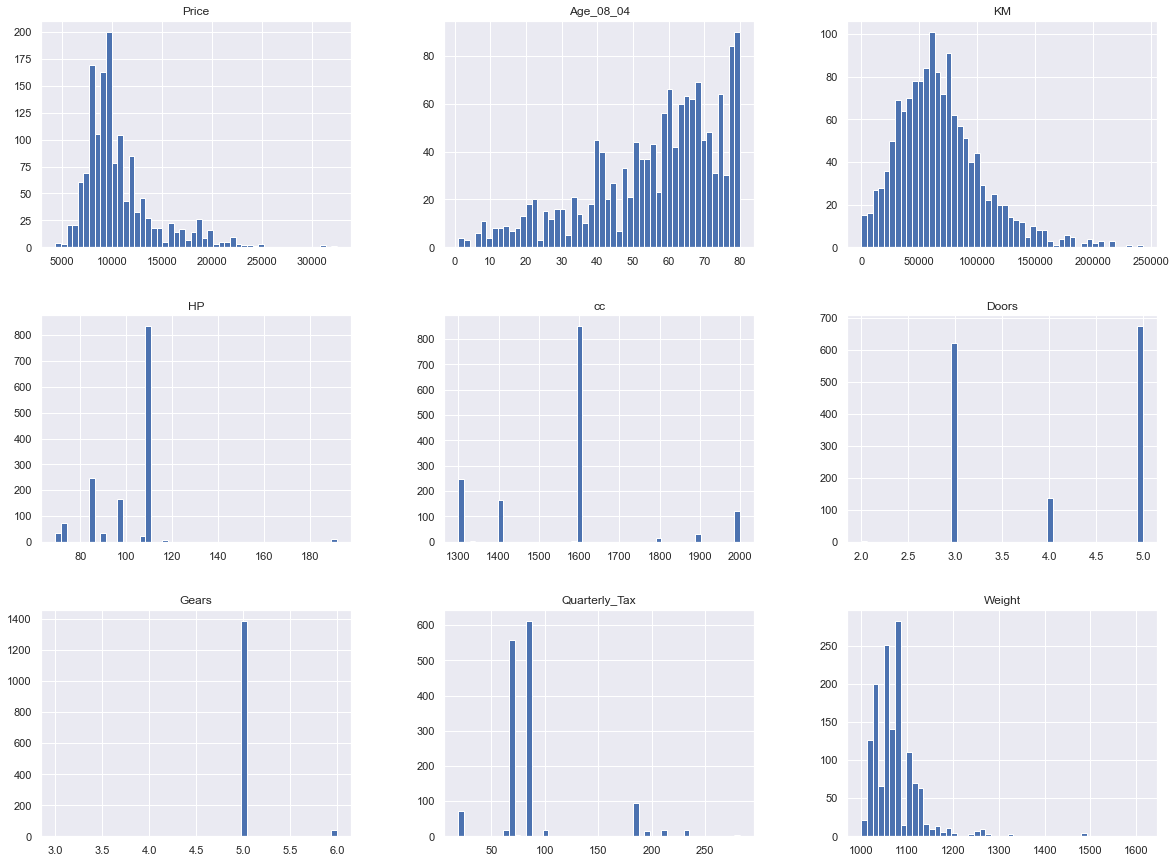

In [40]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [41]:
# Transforming Price Variable
data['log_price'] = np.log(data['Price'])
data1 = data.drop('Price',axis=1)

In [42]:
data1.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,log_price
0,23,46986,90,2000,3,5,210,1165,9.51
1,23,72937,90,2000,3,5,210,1165,9.53
2,24,41711,90,2000,3,5,210,1165,9.54
3,26,48000,90,2000,3,5,210,1165,9.61
4,30,38500,90,2000,3,5,210,1170,9.53


# Linearity Assumption Check

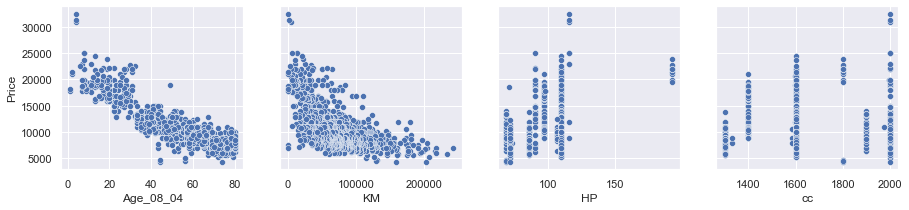

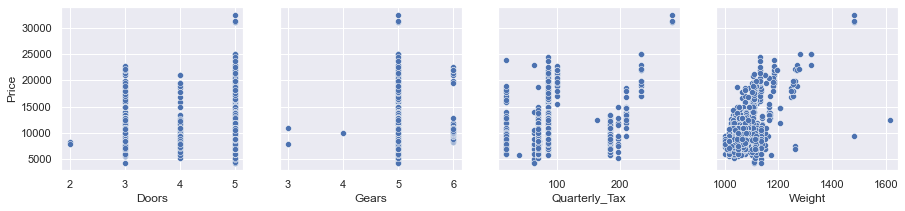

In [43]:
f,(ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
f,(ax5,ax6,ax7,ax8) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
sns.scatterplot(data['Age_08_04'], data['Price'], ax = ax1)
sns.scatterplot(data['KM'], data['Price'], ax = ax2)
sns.scatterplot(data['HP'], data['Price'], ax = ax3)
sns.scatterplot(data['cc'], data['Price'], ax = ax4)
sns.scatterplot(data['Doors'], data['Price'], ax = ax5)
sns.scatterplot(data['Gears'], data['Price'], ax = ax6)
sns.scatterplot(data['Quarterly_Tax'], data['Price'], ax = ax7)
sns.scatterplot(data['Weight'], data['Price'], ax = ax8)
plt.show()

# Model Building

### Declare the inputs and the targets

In [44]:
targets = data1['log_price']
inputs = data1.drop(['log_price'],axis=1)

### Scale the data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [46]:
inputs_scaled = scaler.transform(inputs)

### Splitting the Data into training and testing

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [48]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

# No Multicollinearity Assumption Check

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = pd.DataFrame(inputs_scaled, columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,Age_08_04,1.89
1,KM,1.91
2,HP,1.58
3,cc,2.75
4,Doors,1.16
5,Gears,1.10
6,Quarterly_Tax,2.86
7,Weight,2.87


# Predictions

In [50]:
y_hat = reg.predict(x_train)

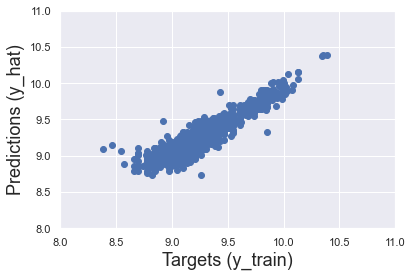

In [51]:
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(8,11)
plt.ylim(8,11)
plt.show()

In [72]:
predictions = pd.DataFrame({'Fitted Values' : np.exp(y_hat),
                            'Actual Values' : np.exp(y_train),
                            'Residuals'     : np.exp(y_train) - np.exp(y_hat),
                            'Residual%'     : (np.exp(y_train) - np.exp(y_hat))*100/np.exp(y_train)})
predictions.head()

,Fitted Values,Actual Values,Residuals,Residual%
925,9376.26,8950.00,-426.26,-4.76
46,16401.59,17950.00,1548.41,8.63
440,10036.28,11950.00,1913.72,16.01
465,10114.05,11450.00,1335.95,11.67
43,15460.60,16950.00,1489.40,8.79


# Normality of Residuals

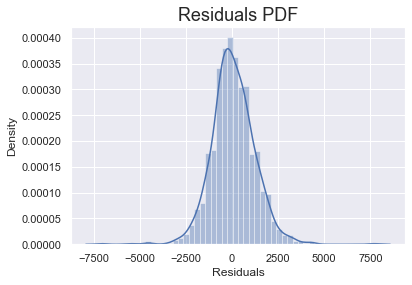

In [73]:
sns.distplot(predictions['Residuals'])
plt.title("Residuals PDF", size=18)
plt.show()

# Homoscedasticity Assumption Check

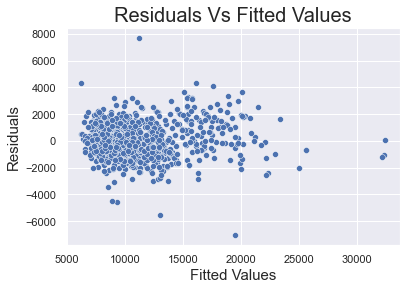

In [74]:
sns.scatterplot(predictions['Fitted Values'], predictions['Residuals'])
plt.title('Residuals Vs Fitted Values', fontsize = 20)
plt.xlabel('Fitted Values', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.show()

# No Auto-Correlation of Residuals -  Assumption Check

In [54]:
from statsmodels.stats.stattools import durbin_watson

In [75]:
durbin_watson(predictions['Residuals'])

2.0516107337283165

## R Squared

In [76]:
reg.score(x_train,y_train)

0.8518965212705214

### Finding the weights(Coefficients) and bias(intercept)

In [77]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.237826324340183

In [78]:
# Obtain the weights (coefficients) of the regression
reg.coef_

array([-0.18949117, -0.07139214,  0.04213944, -0.02101939,  0.0065925 ,
        0.01178014,  0.03358024,  0.04294479])

In [79]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Age_08_04,-0.19
1,KM,-0.07
2,HP,0.04
3,cc,-0.02
4,Doors,0.01
5,Gears,0.01
6,Quarterly_Tax,0.03
7,Weight,0.04


## Testing

In [80]:
y_hat_test = reg.predict(x_test)

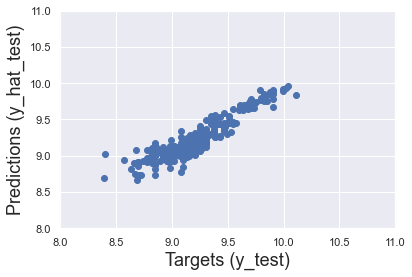

In [89]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(8,11)
plt.ylim(8,11)
plt.show()

In [88]:
reg.score(x_test,y_test)

0.8563826851070241